In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
from datetime import datetime
pd.set_option('display.max_colwidth', None)

In [225]:
prev_releases = len(releases_raw)
prev_repo_imports = len(repo_imports)
prev_repo_import_diffs = len(repo_import_diffs)
prev_repo_import_diffs_timeline = len(repo_import_diffs_timeline)

In [226]:
releases_raw = pd.read_csv('../data/csv/releases.csv')
imports = pd.read_csv('../data/csv/imports.csv')
import_diffs = pd.read_csv('../data/csv/import_diffs.csv')
repo_imports = pd.read_csv('../data/csv/repo_imports.csv')
repo_import_diffs = pd.read_csv('../data/csv/repo_import_diffs.csv')
repo_import_diffs_timeline = pd.read_csv('../data/csv/repo_import_diffs_timeline.csv')

In [227]:
print(f"Releases: {prev_releases} {len(releases_raw)}")
print(f"repo_imports: {prev_repo_imports} {len(repo_imports)}")
print(f"repo_import_diffs: {prev_repo_import_diffs} {len(repo_import_diffs)}")
print(f"repo_import_diffs_timeline: {prev_repo_import_diffs_timeline} {len(repo_import_diffs_timeline)}")

Releases: 1561 1766
repo_imports: 3613 3761
repo_import_diffs: 242 274
repo_import_diffs_timeline: 4004 4412


In [228]:
ml_libraries = ["tensorflow", "torch", "theano", "keras"]

ml_imports = imports[imports['name'].isin(ml_libraries)]
ml_imports_diffs = import_diffs[import_diffs['import_name'].isin(ml_libraries)]
ml_repo_imports = repo_imports[repo_imports['import_name'].isin(ml_libraries)]
ml_repo_import_diffs = repo_import_diffs[repo_import_diffs['import_name'].isin(ml_libraries)]
ml_repo_import_diffs_timeline = pd.DataFrame(
    repo_import_diffs_timeline[repo_import_diffs_timeline['import'].isin(ml_libraries)]
)

Transform Releases data

In [229]:
releases_raw['date'] = pd.to_datetime(releases_raw['date_time'])
releases = releases_raw.drop(columns=['year', 'month', 'day', 'time', 'date_time'])
ml_repo_import_diffs_timeline['date'] = pd.to_datetime(ml_repo_import_diffs_timeline['date'])

In [230]:
theano_counts = ml_repo_import_diffs_timeline[ml_repo_import_diffs_timeline['import'] == 'theano']
tensorflow_counts = ml_repo_import_diffs_timeline[ml_repo_import_diffs_timeline['import'] == 'tensorflow']
torch_counts = ml_repo_import_diffs_timeline[ml_repo_import_diffs_timeline['import'] == 'torch']
keras_counts = ml_repo_import_diffs_timeline[ml_repo_import_diffs_timeline['import'] == 'keras']
# tensorflow_counts.head(50)

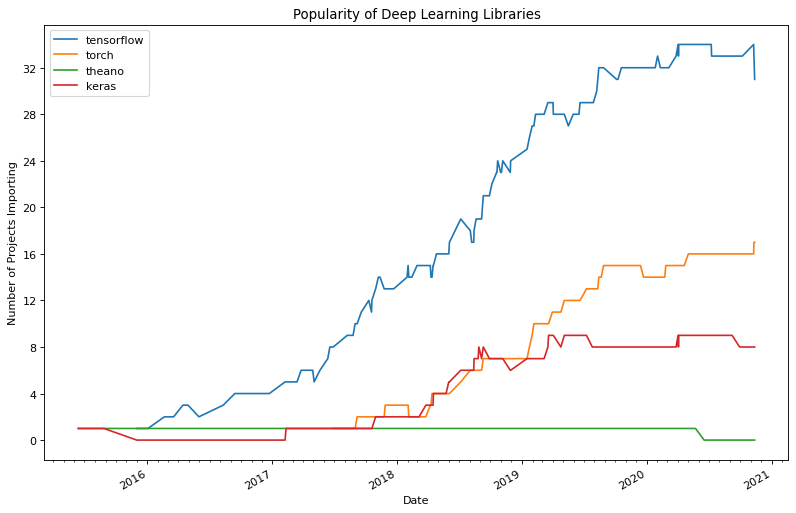

In [231]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80 # 200 e.g. is really fine, but slower

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
fig, ax = plt.subplots()

ax.plot(tensorflow_counts['date'], tensorflow_counts['count'], label='tensorflow')
ax.plot(torch_counts['date'], torch_counts['count'], label='torch')
ax.plot(theano_counts['date'], theano_counts['count'], label='theano')
ax.plot(keras_counts['date'], keras_counts['count'], label='keras')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Projects Importing')
ax.set_title('Popularity of Deep Learning Libraries')
ax.legend()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
                           
# datemin = datetime.date(ml_repo_import_diffs_timeline['date'].min().year, 1, 1)
# datemax = datetime.date(ml_repo_import_diffs_timeline['date'].max().year + 1, 1, 1)
# ax.set_xlim(datemin, datemax)

fig.autofmt_xdate()

plt.show()


In [ ]:
python 